# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
 # Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1




# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    
    city_url = url + 'appid=' + weather_api_key + '&q=' + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1
    
    response = requests.get(city_url)

    response_json = response.json() 
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()['weather']
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response.json()['coord']['lat']
        city_lng = response.json()['coord']['lon']
        city_max_temp = (response.json()['main']['temp_max'] - 273.15)
        city_humidity = response.json()['main']['humidity']
        city_clouds = response.json()['clouds']['all']
        city_wind = response.json()['wind']['speed']
        city_country = response.json()['sys']['country']
        city_date = response.json()['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

City not found. Skipping...
Processing Record 44 of Set 9 | san felipe
City not found. Skipping...
Processing Record 45 of Set 9 | thompson
City not found. Skipping...
Processing Record 46 of Set 9 | mindelo
City not found. Skipping...
Processing Record 47 of Set 9 | wilmington
City not found. Skipping...
Processing Record 48 of Set 9 | shepsi
City not found. Skipping...
Processing Record 49 of Set 9 | kochki
City not found. Skipping...
Processing Record 0 of Set 10 | lakeway
City not found. Skipping...
Processing Record 1 of Set 10 | menasha
City not found. Skipping...
Processing Record 2 of Set 10 | lima
City not found. Skipping...
Processing Record 3 of Set 10 | san carlos de bariloche
City not found. Skipping...
Processing Record 4 of Set 10 | laredo
City not found. Skipping...
Processing Record 5 of Set 10 | mar del plata
City not found. Skipping...
Processing Record 6 of Set 10 | maymyo
City not found. Skipping...
Processing Record 7 of Set 10 | rize
City not found. Skipping...
P

City not found. Skipping...
Processing Record 16 of Set 12 | kiama
City not found. Skipping...
Processing Record 17 of Set 12 | tungor
City not found. Skipping...
Processing Record 18 of Set 12 | tyazhinskiy
City not found. Skipping...
Processing Record 19 of Set 12 | bilibino
City not found. Skipping...
Processing Record 20 of Set 12 | sibolga
City not found. Skipping...
Processing Record 21 of Set 12 | flin flon
City not found. Skipping...
Processing Record 22 of Set 12 | yelovo
City not found. Skipping...
Processing Record 23 of Set 12 | sovetskiy
City not found. Skipping...
Processing Record 24 of Set 12 | julio de castilhos
City not found. Skipping...
Processing Record 25 of Set 12 | gornopravdinsk
City not found. Skipping...
Processing Record 26 of Set 12 | simplicio mendes
City not found. Skipping...
Processing Record 27 of Set 12 | horsham
City not found. Skipping...
Processing Record 28 of Set 12 | nyurba
City not found. Skipping...
Processing Record 29 of Set 12 | ambilobe
Ci

In [ ]:
city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

In [234]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wainwright,28.0667,95.3333,25.34,23,0,1.81,IN,1675487741


In [218]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [219]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alangayam,28.0667,95.3333,25.34,23,0,1.81,IN,1675487741


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

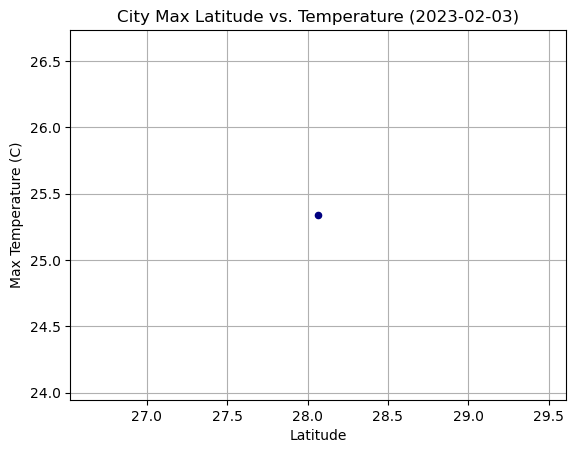

In [220]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter('Lat','Max Temp', c = 'navy')


# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2023-02-03)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

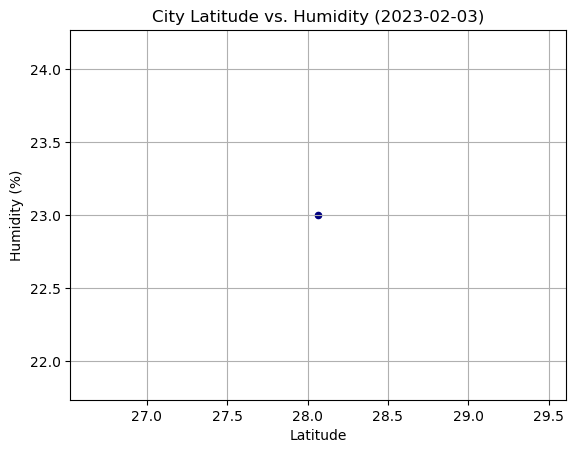

In [221]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat','Humidity', c = 'navy')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2023-02-03)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

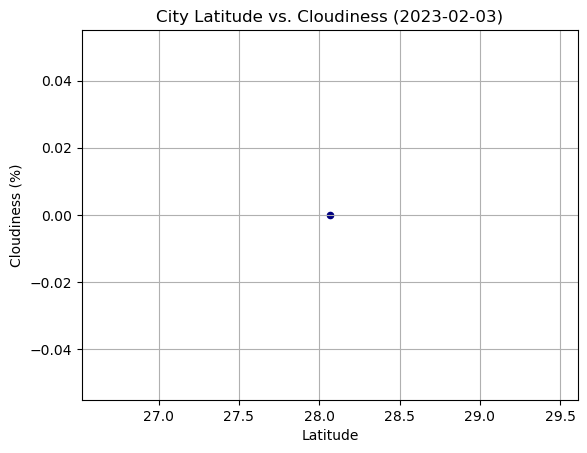

In [222]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat','Cloudiness', c = 'navy')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2023-02-03)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

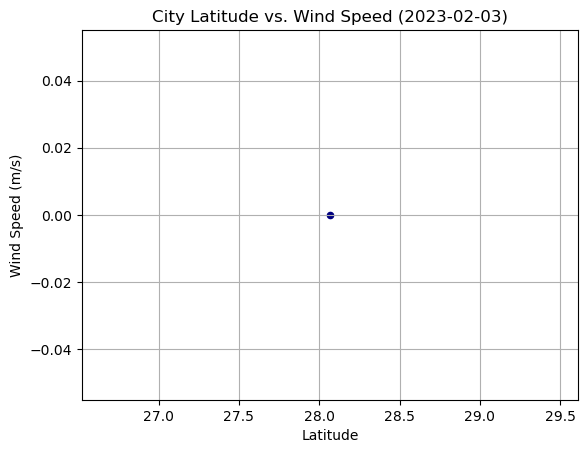

In [223]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat','Cloudiness', c = 'navy')

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2023-02-03)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


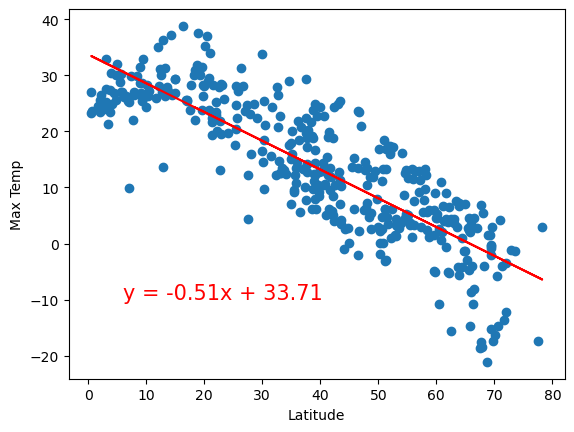

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


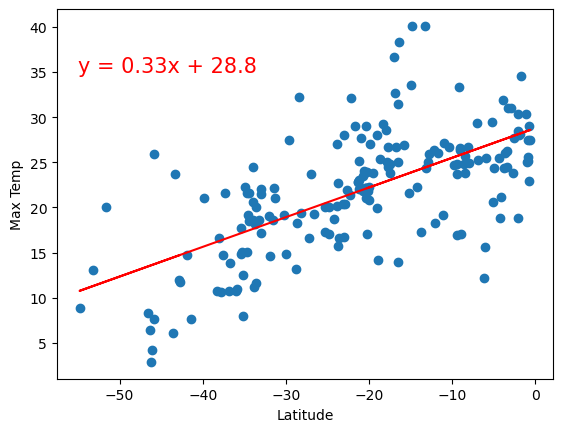

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


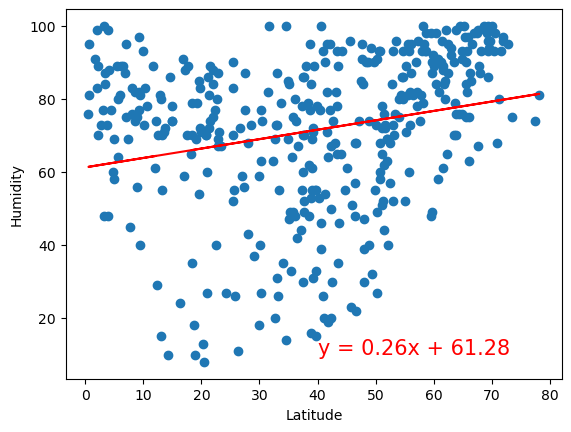

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


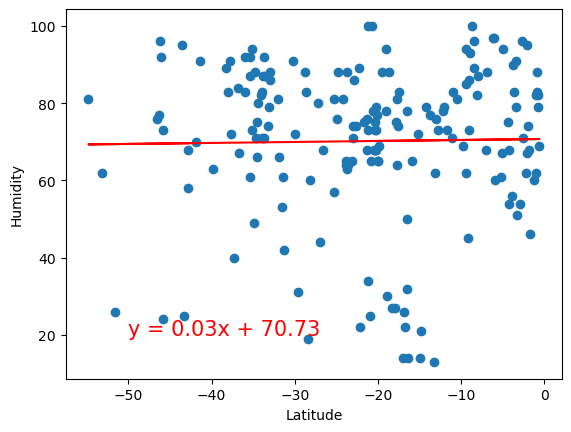

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


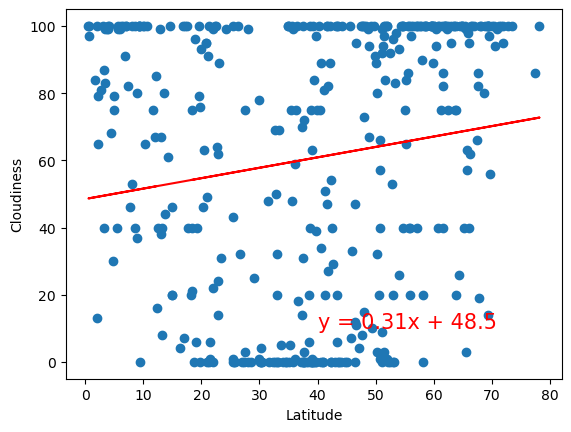

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


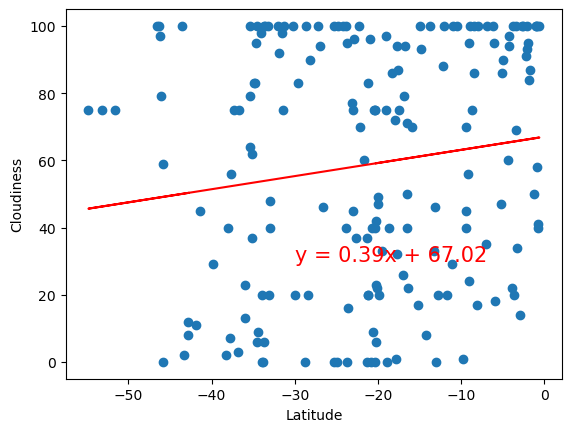

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


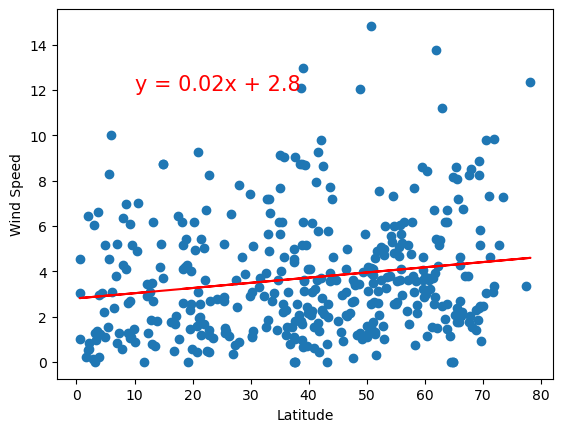

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


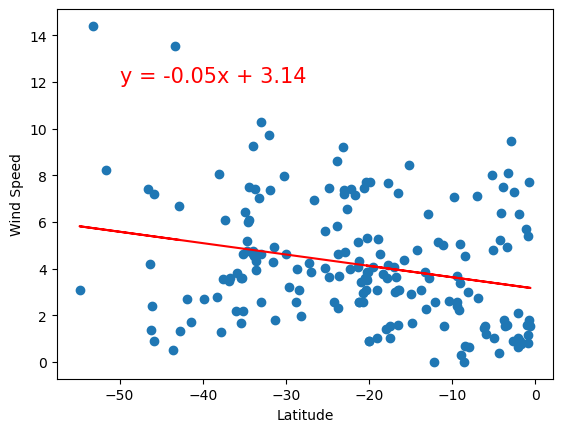

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE